<a href="https://colab.research.google.com/github/AymanMansur/Insider-threat-detection-using-cert-dataset-Logon-/blob/main/iso_forest_non_working_hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection in Non-Working Hour Logon Sessions Using Isolation Forest**

## **Introduction**
*This project aims to detect anomalies in user logon sessions outside working hours using the Isolation Forest algorithm. The dataset contains logon and logoff times, session durations, and timestamps. By identifying unusual patterns, we can detect potential insider threats or unauthorized access attempts.*

## **Dataset Description**
The dataset contains the following key attributes:
*   *Date: The date of the session.*
*   *Logon: The time when the user logged in.*
*   *Logoff: The time when the user logged off.*
*   *Session_Duration: The duration of the session in HH:MM:SS format.*








### **Import Libraries**


*   **pandas:** *For data manipulation.*
*   **numpy:** *For numerical operations.*
*   **matplotlib:** *For visualization.*
*   **IsolationForest:** *A machine-learning algorithm for anomaly detection.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

### **Reading and preparing the data**

In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/dataset/single user dataset/detection/summary(date,logon,logff,session duration)_non working hour.xlsx"
df = pd.read_excel(file_path)

# Display basic info about the dataset
print(df.head())

         Date Session_Duration  Logoff  Logon
0  2010-01-02         00:34:25       3      3
1  2010-01-04         00:02:42       1      1
2  2010-01-05         00:24:10       2      2
3  2010-01-06         00:58:59       5      5
4  2010-01-07         00:26:33       4      3


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              119 non-null    object
 1   Session_Duration  119 non-null    object
 2   Logoff            119 non-null    int64 
 3   Logon             119 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.8+ KB
None


#### ***Convert the "date" column in df to actual datetime objects so we can perform time-based operations***

In [ ]:
# Convert date column to datetime (if applicable)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              119 non-null    datetime64[ns]
 1   Session_Duration  119 non-null    object        
 2   Logoff            119 non-null    int64         
 3   Logon             119 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ KB
None


### **Convert Session Duration to Seconds**
*  *Converts Session Duration from HH:MM:SS format to total seconds for numerical processing. *
*   *Handles missing or incorrect values by returning NaN.*



In [ ]:
# Convert session duration from 'HH:MM:SS' to total seconds
def convert_to_seconds(time_str):
    if isinstance(time_str, str):  # Ensure it's a string before processing
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    return np.nan  # Handle missing or incorrect values

df['Session_Duration'] = df['Session_Duration'].apply(convert_to_seconds)

### **Select Features for Anomaly Detection**
*   *Selects relevant features (Logon, Logoff, Session Duration) for anomaly detection.*
*   *Replaces missing values with the median of each column.*






In [ ]:
# Select features for anomaly detection
features = ['Logon', 'Logoff', 'Session_Duration']
df_filtered = df[features]

# Handle missing values
df_filtered = df_filtered.fillna(df_filtered.median())

### **Apply Isolation Forest Algorithm**
*   *n_estimators=5000: Uses 5000 trees for better accuracy.*
*   *contamination=0.05: Assumes 5% of the data contains anomalies.*
*  *random_state=42: Ensures reproducibility.*
### **Map Anomaly Labels**
*   *Maps 1 → Normal and -1 → Anomaly.*
*  *Prints the count of normal and anomalous sessions.*




In [ ]:
# Apply Isolation Forest
iso_forest = IsolationForest(n_estimators=5000, contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df_filtered)

# Map anomaly labels (-1 for anomaly, 1 for normal)
df['anomaly'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Count of anomalies
print(df['anomaly'].value_counts())

anomaly
Normal     113
Anomaly      6
Name: count, dtype: int64


### **Visualization of Anomalies & Conclusion**
*This project successfully detects anomalies in user logon activity using Isolation Forest. By analyzing session durations and login/logout times, potential security threats can be identified efficiently.*

In [ ]:
# Filter data for plotting separately
anomalies = df[df['anomaly'] == 'Anomaly']
normal = df[df['anomaly'] == 'Normal']

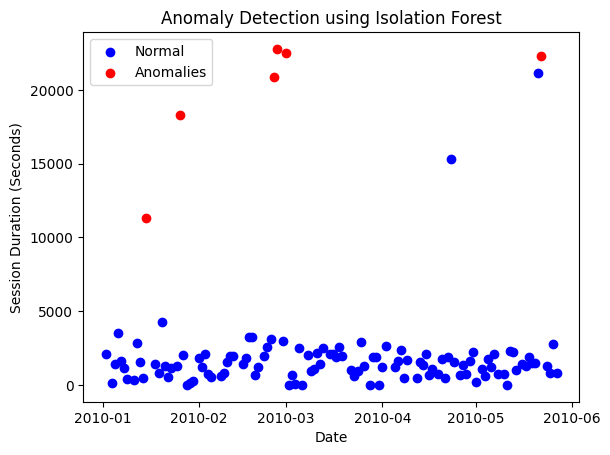

In [ ]:
# Plot normal points
plt.scatter(normal['Date'], normal['Session_Duration'], color='blue', label='Normal')
# Plot anomalies
plt.scatter(anomalies['Date'], anomalies['Session_Duration'], color='red', label='Anomalies')

plt.xlabel('Date')
plt.ylabel('Session Duration (Seconds)')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()

In [ ]:
# Save results
df.to_excel("/content/drive/MyDrive/dataset/single user dataset/detection/anomalies.xlsx", index=False)
print("Anomaly detection results saved.")

Anomaly detection results saved.


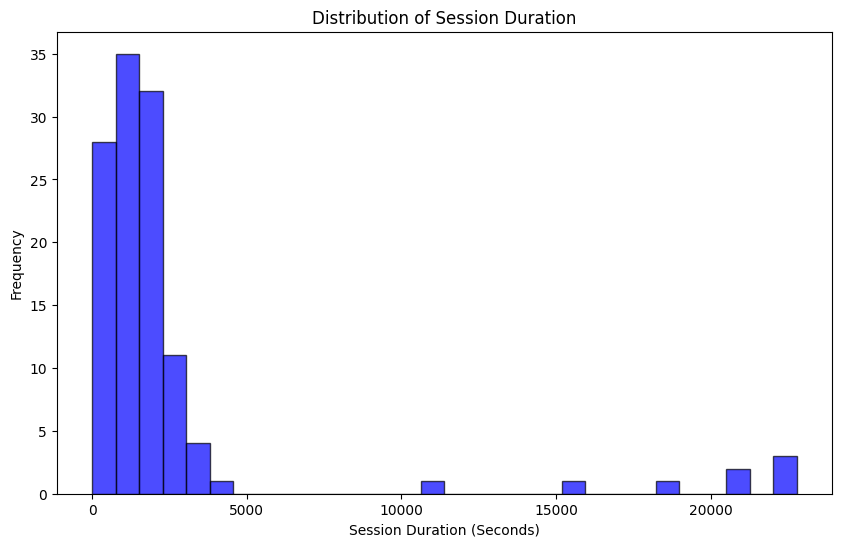

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Session_Duration'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Duration')
plt.show()


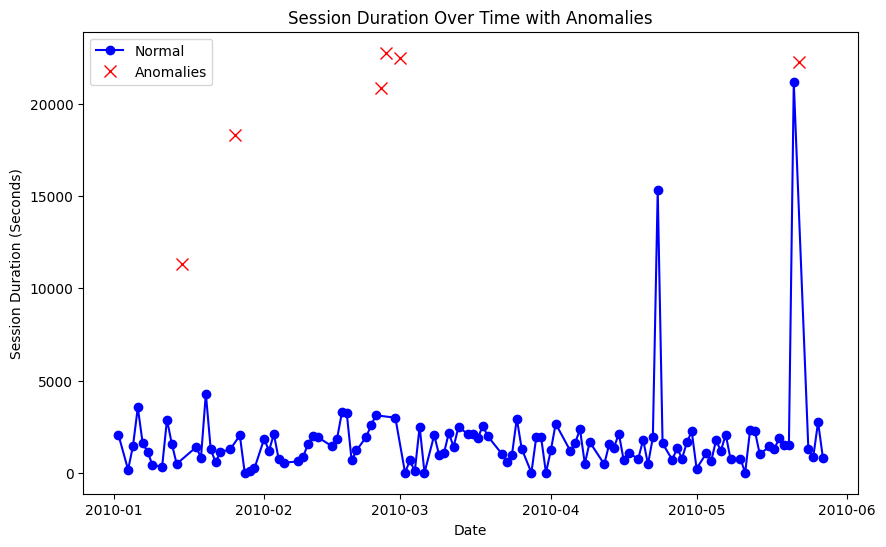

In [ ]:
plt.figure(figsize=(10, 6))

# Plot normal points
plt.plot(normal['Date'], normal['Session_Duration'], linestyle='-', marker='o', color='blue', label='Normal')

# Plot anomalies
plt.plot(anomalies['Date'], anomalies['Session_Duration'], linestyle='None', marker='x', color='red', markersize=8, label='Anomalies')

plt.xlabel('Date')
plt.ylabel('Session Duration (Seconds)')
plt.title('Session Duration Over Time with Anomalies')
plt.legend()
plt.show()
